1.- Importacion de datos y standarizacion de nombre de columnas

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv("./data/social_net_data.csv")
dataset.head()


,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


Analizando las correlaciones mediante un mapa de calor

In [51]:

x = dataset[["Age", "EstimatedSalary"]].values
y = dataset[["Purchased"]].values


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)



0.93


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(X_train, y_train)

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
#Evaluacion del modelo con puntaje F1
from sklearn.metrics import f1_score, jaccard_score, confusion_matrix
y_pred = classifier.predict(X_test)
print("Puntaje F1", f1_score(y_test,y_pred,average='weighted'))
print("Puntaje Jaccard", jaccard_score(y_test,y_pred,pos_label=2,average='weighted'))
#Evaluacion del modelo con indice de Jaccard
cm = confusion_matrix(y_test,y_pred)


Puntaje F1 0.9302792022792024
Puntaje Jaccard 0.870735524256651


/home/eyacelga/.virtualenvs/ai-proyecto-local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1561: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


/tmp/ipykernel_70828/2128025453.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


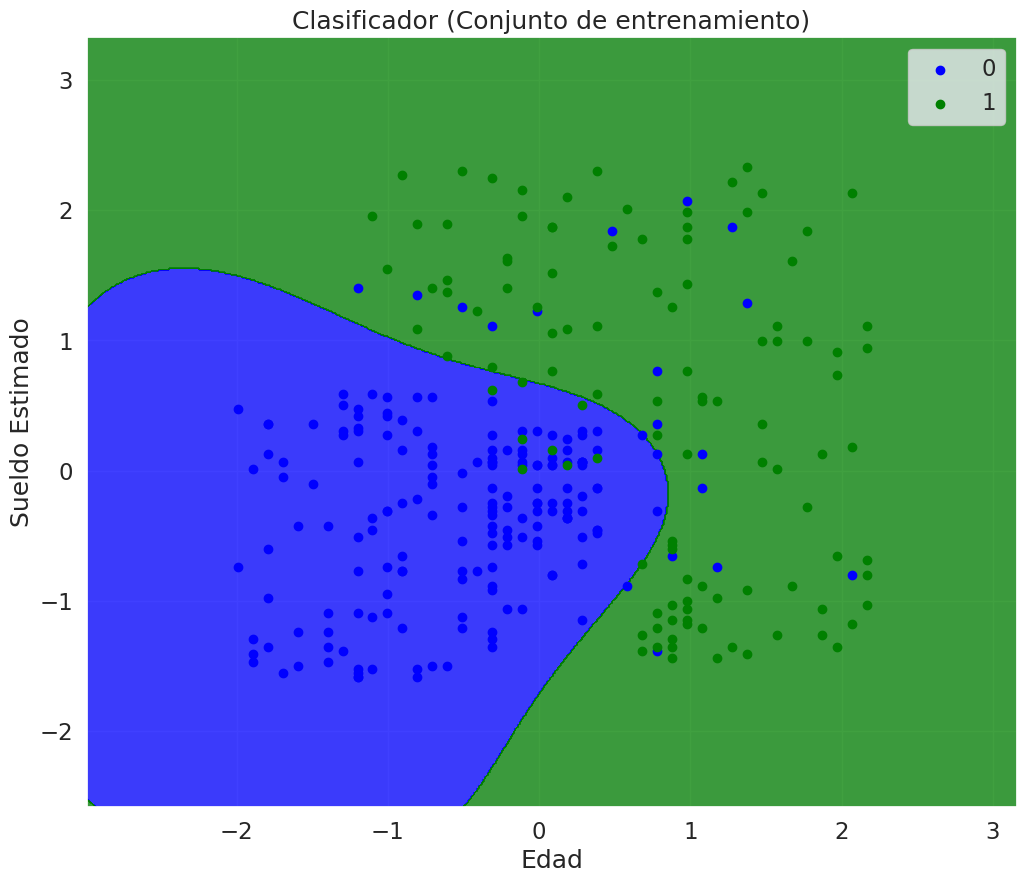

In [61]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Definir los conjuntos X_set y y_set
X_set, y_set = X_train, y_train

minimo_primera_columna = X_set[:, 0].min() -1
minimo_segunda_columna = X_set[:, 1].min() -1

maximo_primera_columna = X_set[:, 0].max() +1
maximo_segunda_columna = X_set[:, 1].max() +1
# Crear una malla de puntos para graficar las fronteras de decisión
X1, X2 = np.meshgrid(np.arange(start = minimo_primera_columna , stop = maximo_primera_columna , step = 0.01),
                     np.arange(start = minimo_segunda_columna , stop = maximo_segunda_columna , step = 0.01))

# Predecir las clases para cada punto en la malla
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Graficar las regiones de decisión
plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('blue', 'green')))



# Ajustar los límites de los ejes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('blue', 'green'))(i), label = j)
# Agregar etiquetas y leyenda
plt.title('Clasificador (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()

# Mostrar el gráfico
plt.show()

/tmp/ipykernel_70828/3789898982.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


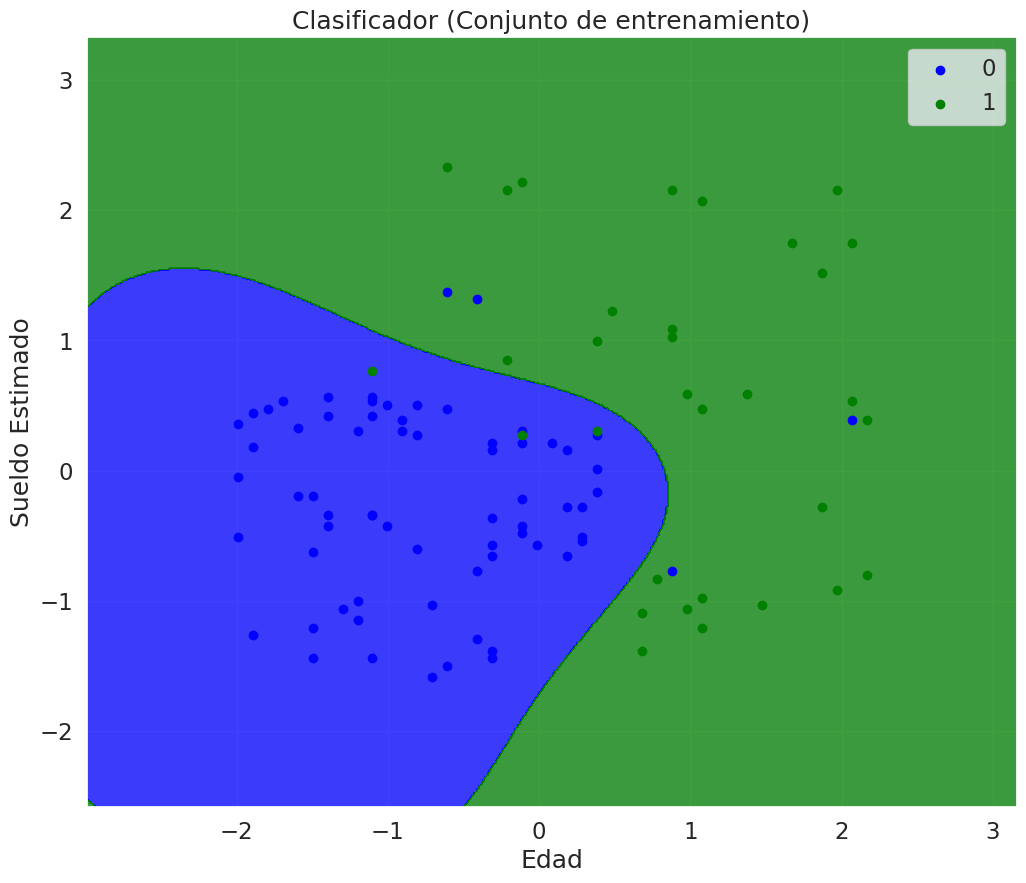

In [64]:
X_set, y_set = X_test, y_test

minimo_primera_columna = X_set[:, 0].min() -1
minimo_segunda_columna = X_set[:, 1].min() -1

maximo_primera_columna = X_set[:, 0].max() +1
maximo_segunda_columna = X_set[:, 1].max() +1
# Crear una malla de puntos para graficar las fronteras de decisión
X1, X2 = np.meshgrid(np.arange(start = minimo_primera_columna , stop = maximo_primera_columna , step = 0.01),
                     np.arange(start = minimo_segunda_columna , stop = maximo_segunda_columna , step = 0.01))

# Predecir las clases para cada punto en la malla
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Graficar las regiones de decisión
plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('blue', 'green')))



# Ajustar los límites de los ejes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('blue', 'green'))(i), label = j)
# Agregar etiquetas y leyenda
plt.title('Clasificador (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()

# Mostrar el gráfico
plt.show()

5. Creacion del modelo como PKL

In [63]:
from joblib import dump
dump(classifier, './model/model-svm.pkl')

['./model/model-svm.pkl']